# 우리나라 기상위성 GK2A
## GK2A 관련 링크 [천리안위성소개](https://nmsc.kma.go.kr/homepage/html/base/cmm/selectPage.do?page=static.satllite.introGk2a)


# 기본 환경 설정

In [14]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip uninstall shapely
!pip install shapely --no-binary shapely
!pip install netCDF4

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.1.1-1~jammy0).
proj-bin is already the newest version (9.1.1-1~jammy0).
proj-data is already the newest version (9.1.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
Found existing installation: shapely 2.0.3
Uninstalling shapely-2.0.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/shapely-2.0.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/shapely/*
Proceed (Y/n)? Y
  Successfully uninstalled shapely-2.0.3
  Using cached shapely-2.0.3-cp310-cp310-linux_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beh

> Y 를 꼭 입력한다. 그래야 환경 설정 완료

# 드라이브 마운트

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!ls /content/drive/MyDrive/ColabNotebooks/충남과고/work/01

gk2a_ami_le1b_vi008_ko010lc_202402110000.nc  gk2a_ami_le1b_vi008_ko010lc_202402111200.nc
gk2a_ami_le1b_vi008_ko010lc_202402110100.nc  gk2a_ami_le1b_vi008_ko010lc_202402111300.nc
gk2a_ami_le1b_vi008_ko010lc_202402110200.nc  gk2a_ami_le1b_vi008_ko010lc_202402111400.nc
gk2a_ami_le1b_vi008_ko010lc_202402110300.nc  gk2a_ami_le1b_vi008_ko010lc_202402111500.nc
gk2a_ami_le1b_vi008_ko010lc_202402110400.nc  gk2a_ami_le1b_vi008_ko010lc_202402111600.nc
gk2a_ami_le1b_vi008_ko010lc_202402110500.nc  gk2a_ami_le1b_vi008_ko010lc_202402111700.nc
gk2a_ami_le1b_vi008_ko010lc_202402110600.nc  gk2a_ami_le1b_vi008_ko010lc_202402111800.nc
gk2a_ami_le1b_vi008_ko010lc_202402110700.nc  gk2a_ami_le1b_vi008_ko010lc_202402111900.nc
gk2a_ami_le1b_vi008_ko010lc_202402110800.nc  gk2a_ami_le1b_vi008_ko010lc_202402112000.nc
gk2a_ami_le1b_vi008_ko010lc_202402110900.nc  gk2a_ami_le1b_vi008_ko010lc_202402112100.nc
gk2a_ami_le1b_vi008_ko010lc_202402111000.nc  gk2a_ami_le1b_vi008_ko010lc_202402112200.nc
gk2a_ami_le1b_vi008_k

> 파일이 어떤 것들이 있는지 확인한다.

# 기본 라이브러리 불러오기

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from netCDF4 import Dataset
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 탐색

## 데이터 읽기

In [114]:
data_path='/content/drive/MyDrive/ColabNotebooks/data/'

In [115]:
nc_fname='gk2a_ami_le1b_ir105_ea020lc_202104010000.nc'
nc=Dataset(data_path+nc_fname,'r', format='netcdf4')
print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    projection_type: lambert_conformal_conic
    standard_parallel1: 30.0
    standard_parallel2: 60.0
    origin_latitude: 38.0
    central_meridian: 126.0
    false_easting: 0.0
    false_northing: 0.0
    image_width: 3000
    image_height: 2600
    pixel_size: 2000.0
    upper_left_easting: -2999000.0
    upper_left_northing: 2599000.0
    upper_right_easting: 2999000.0
    upper_right_northing: 2599000.0
    lower_left_easting: -2999000.0
    lower_left_northing: -2599000.0
    lower_right_easting: 2999000.0
    lower_right_northing: -2599000.0
    _CoordinateTransformType: 0.0
    _CoordinateAxisTypes: 0.0
    file_name: gk2a_ami_le1b_ir105_ea020lc_202104010000.nc
    origianl_sourece_file: gk2a_ami_le1b_ir105_fd020ge_202104010000.nc
    number_of_columns: 3000
    number_of_lines: 2600
    total_pixel_data_size: 7800000
    channel_center_wavelength: 10.5
    channel_spatial_resolution: 2.0
   

>데이터 모양 확인하기

## 변수 확인하기

In [106]:
# 데이터 형태 확인
ncdata=nc['image_pixel_values'] #data=nc.variables['image_pixel_values']와 같음
print(ncdata)

<class 'netCDF4._netCDF4.Variable'>
uint16 image_pixel_values(dim_y, dim_x)
    number_of_total_pixels: 7800000
    average_pixel_value: 11278.503699636363
    channel_name: IR105
    max_pixel_value: 32768
    min_pixel_value: 2158
    number_of_total_bits_per_pixel: 16
    number_of_valid_bits_per_pixel: 13
unlimited dimensions: 
current shape = (2600, 3000)
filling on, default _FillValue of 65535 used


In [107]:
# 데이터 값 확인
data=nc.variables['image_pixel_values'][:,:]
print(data)

[[5933 5926 5938 ... 6160 6504 6697]
 [5934 5926 5938 ... 6346 6504 6835]
 [5934 5933 5938 ... 6346 6792 6835]
 ...
 [4809 4667 4617 ... 3228 3231 3231]
 [4541 4667 4772 ... 3228 3231 3233]
 [4458 4541 4737 ... 3225 3231 3234]]


In [124]:
data

masked_array(
  data=[[5933, 5926, 5938, ..., 6160, 6504, 6697],
        [5934, 5926, 5938, ..., 6346, 6504, 6835],
        [5934, 5933, 5938, ..., 6346, 6792, 6835],
        ...,
        [4809, 4667, 4617, ..., 3228, 3231, 3231],
        [4541, 4667, 4772, ..., 3228, 3231, 3233],
        [4458, 4541, 4737, ..., 3225, 3231, 3234]],
  mask=False,
  fill_value=999999,
  dtype=uint16)

## 데이터 탐색 및 변환
- 16비트 데이터를 13비트로 변환
- DN 을 물리값으로 변환
- 변환 테이블 이용하기

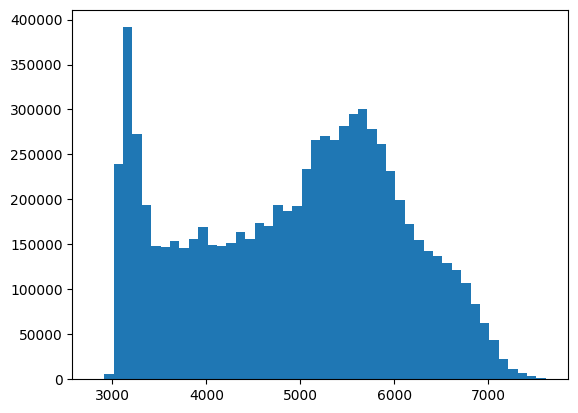

In [108]:
#1D 로 그려보기
data_1d=data.flatten()
plt.hist(data_1d, bins=range(np.min(data),np.max(data), 100))
plt.show()

In [109]:
## 변환 함수
# 숫자 13은 00001101 로 표시됩니다. 마찬가지로 17은 00010001 로 표시됩니다 .
# 따라서 13과 17의 비트 AND는 000000001 또는 1입니다.

mask = 0b0001111111111111 #13bit mask
ipixel_process_masked=np.bitwise_and(data,mask)
print(np.bitwise_and(13, 17))


1


In [116]:
ct_path = '/content/drive/MyDrive/ColabNotebooks/data/ct_table/'
AL_postfix='_con_alb.txt'
BT_postfix='_con_bt.txt'
RD_postfix='_con_rad.txt'

In [117]:
channel=ncdata.getncattr('channel_name')
print(channel)

IR105


In [118]:
conversion_table=np.loadtxt(ct_path+channel+BT_postfix,'float64')
data_converted=conversion_table[ipixel_process_masked]
data_converted.shape, np.min(data_converted), np.max(data_converted)

((2600, 3000), 200.110592, 300.241644)

(array([1.20000e+01, 2.30000e+01, 5.20000e+01, 2.85000e+02, 4.79000e+02,
        5.71000e+02, 6.19000e+02, 7.08000e+02, 9.21000e+02, 1.14700e+03,
        1.14300e+03, 1.39100e+03, 1.48400e+03, 1.75200e+03, 2.00200e+03,
        1.89600e+03, 2.54800e+03, 3.41300e+03, 4.73200e+03, 5.35500e+03,
        6.79900e+03, 7.67200e+03, 9.96900e+03, 1.22730e+04, 1.47860e+04,
        1.80690e+04, 1.91210e+04, 2.04380e+04, 2.44420e+04, 2.76780e+04,
        2.94330e+04, 3.25540e+04, 3.56120e+04, 4.12160e+04, 4.44420e+04,
        4.46490e+04, 4.72460e+04, 5.01400e+04, 5.05250e+04, 5.34730e+04,
        5.48050e+04, 5.82490e+04, 5.76240e+04, 6.17320e+04, 6.39810e+04,
        6.83190e+04, 7.19380e+04, 7.66850e+04, 8.32720e+04, 8.87750e+04,
        9.72300e+04, 1.06542e+05, 1.16044e+05, 1.26847e+05, 1.31598e+05,
        1.36574e+05, 1.46393e+05, 1.55403e+05, 1.57125e+05, 1.60350e+05,
        1.54795e+05, 1.55006e+05, 1.53923e+05, 1.48857e+05, 1.51525e+05,
        1.56131e+05, 1.58898e+05, 1.50865e+05, 1.48

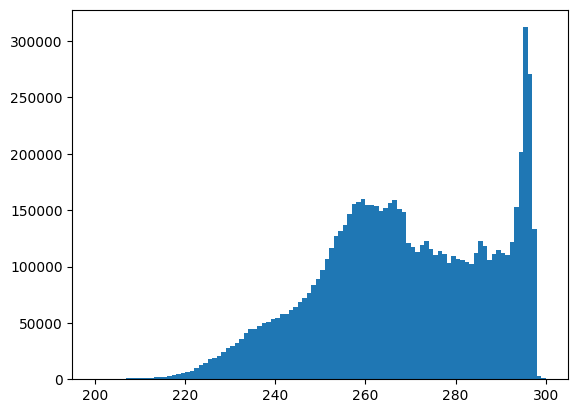

In [119]:
plt.hist(data_converted.flatten(), bins=range(200, 301, 1))

# 데이터 시각화

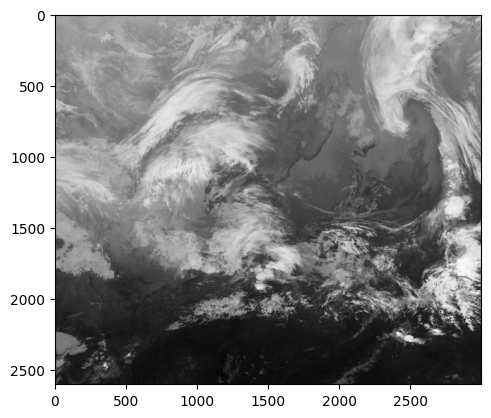

In [126]:
plt.imshow(data, cmap='gray')
plt.show()

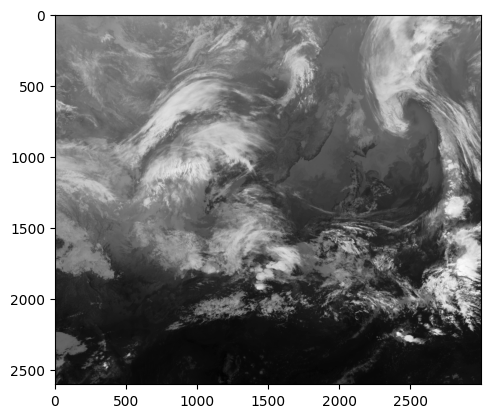

In [127]:
plt.imshow(data_converted, cmap='Greys')
plt.show()

## 지도에 그려보기

In [128]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [129]:
geo_name = 'gk2a_latlon_ea_2000.bin'

with open(nc_path+geo_name,'rb') as f:
    nx, ny =  3000, 2600
    latlon = np.fromfile(f, dtype='float', count=nx*ny*2)

print(latlon.shape)

latlon=np.reshape(latlon, (ny,nx,2))

lat_arr=latlon[:,:,0]
lon_arr=latlon[:,:,1]

np.min(lat_arr[:,0]), np.min(lat_arr[:,1]), np.max(lat_arr), np.min(lon_arr), np.max(lon_arr)

(15600000,)


(11.30853, 11.31335, 61.93105, 76.81183, 175.18817)

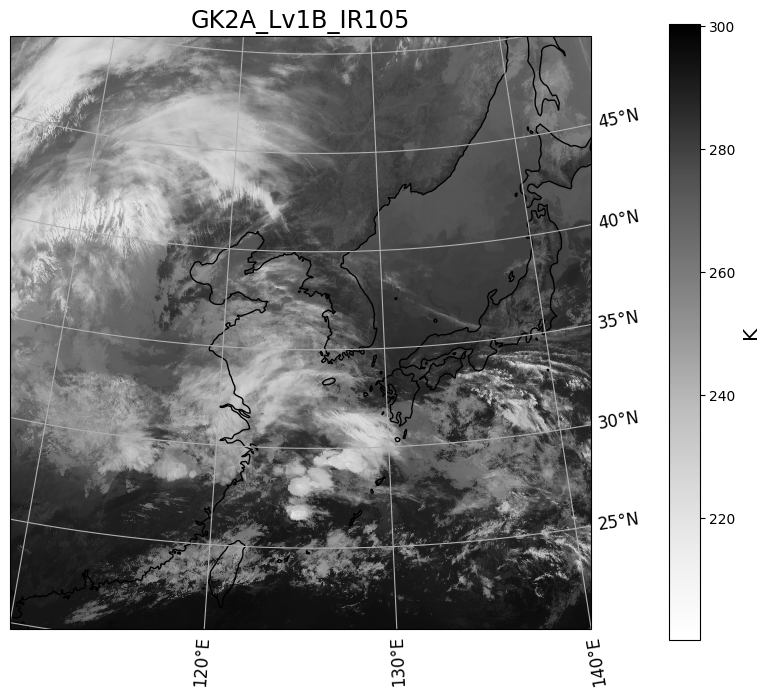

In [130]:
fig = plt.figure(figsize=(10,10))

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap='Greys', transform=ccrs.PlateCarree())
ax.coastlines()

ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
plt.show()